In [8]:
!pip install pandas altair vega_datasets vega nb_black selenium > /dev/null 2>&1

<IPython.core.display.Javascript object>

In [9]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [10]:
import pandas as pd
import altair as alt
from altair import expr, datum
from vega_datasets import data

alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

<IPython.core.display.Javascript object>

## Reference
![reference](projections.png)

```
Styles used:  
Blue  #3288bd  
Red - #d53e4f  
Gray - #5D646F  
Grid - #5D646F  
Background - #F3F7F7  

Font Family - Ubuntu Mono  
Font Size:  
Title - 30  
Subtitle - 18  
Axis - 13  
```

## Reproduction

In [11]:
df = pd.read_csv("./population_prospects.csv")
df["population"] = df["population"] / 1e3
df.head()

,year,population,type
0,1950,37.297640,estimate
1,1951,37.815540,estimate
2,1952,38.360078,estimate
3,1953,38.915814,estimate
4,1954,39.471403,estimate


<IPython.core.display.Javascript object>

In [12]:
df["type"].unique()

array(['estimate', 'medium variant', 'high variant', 'low variant',
       'constant fertility', 'instant replacement', 'momentum',
       'zero migration', 'constant mortality', 'no change'], dtype=object)

<IPython.core.display.Javascript object>

In [13]:
def gen_line(df: pd.DataFrame, column: str) -> alt.Chart:
    return (
        alt.Chart(df[df["type"] == column])
        .mark_line(strokeDash=[4, 3])
        .encode(
            x=alt.X("year:O",), y=alt.Y("population:Q",), color=alt.value("#D53E4F")
        )
    )


def gen_label(chart: alt.Chart, is_red: bool = False, dy: int = 0):
    color = alt.value("#D53E4F") if is_red else alt.value("#5D646F")
    fontWeight = "bold" if is_red else "lighter"

    return chart.mark_text(
        align="left",
        dx=10,
        dy=dy,
        fontSize=13,
        fontWeight=fontWeight,
        font="Ubuntu Mono",
    ).encode(
        text=alt.condition(alt.datum.year == 2100, "type:N", alt.value("")),
        color=color,
    )

<IPython.core.display.Javascript object>

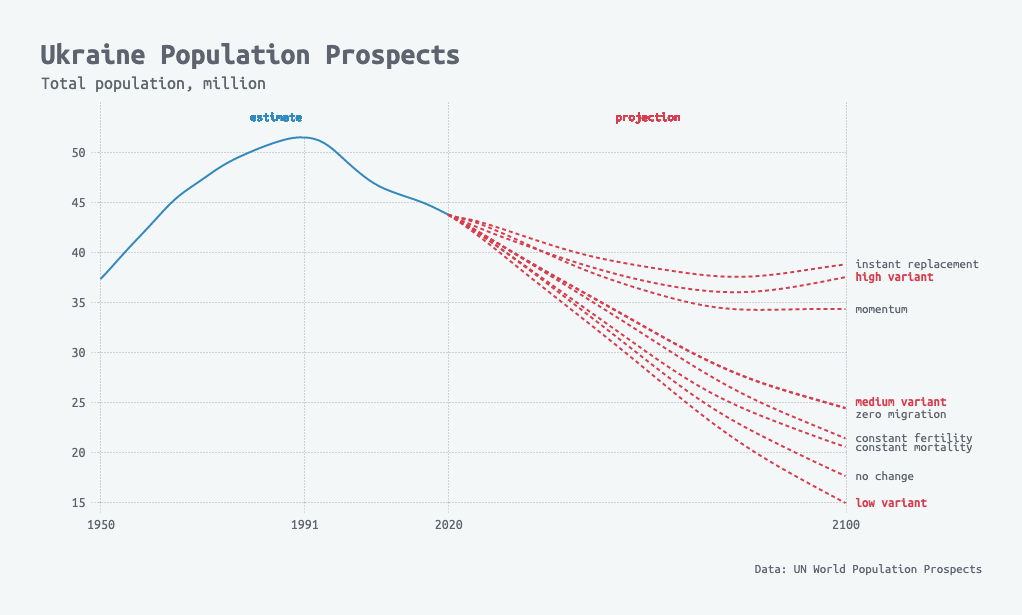

<IPython.core.display.Javascript object>

In [15]:
RED_LINES = [
    "medium variant",
    "high variant",
    "low variant",
    "constant fertility",
    "instant replacement",
    "momentum",
    "zero migration",
    "constant mortality",
    "no change",
]

RED_LABELS = [
    "high variant",
    "medium variant",
    "low variant",
]

LABEL_DY = {
    "medium variant": -6,
    "zero migration": 6,
}

AXIS_CONFIG = dict(
    titleFontSize=18,
    titleFontWeight="normal",
    titleFont="Ubuntu Mono",
    titleColor="#5D646F",
    titleX=55,
    titleY=-10,
    titleAngle=0,
    labelFontSize=14,
    labelFont="Ubuntu Mono",
    labelFontWeight="lighter",
    labelColor="#5D646F",
    labelPadding=5,
)

imaginary_line_data = pd.DataFrame(
    {
        "x": [1991, 1991],
        "y": [df[df["type"] == "estimate"]["population"].max() + 0.1, 55],
    }
)

imaginary_line = (
    alt.Chart(imaginary_line_data)
    .mark_line()
    .encode(x=alt.X("x:O"), y=alt.Y("y:Q"), color=alt.value("#F3F7F7"),)
)

estimate_plot = (
    alt.Chart(df[df["type"] == "estimate"])
    .mark_line()
    .encode(
        x=alt.X(
            "year:O",
            axis=alt.Axis(
                values=[1950, 1991, 2020, 2100], tickSize=10, labelAlign="center",
            ),
            title="Data: UN World Population Prospects",
        ),
        y=alt.Y(
            "population:Q",
            axis=alt.Axis(values=list(range(15, 51, 5))),
            scale=alt.Scale(domain=[15, 51]),
            title="Total population, million",
        ),
        color=alt.value("#3288BD"),
    )
)

estimated_label = (
    alt.Chart(df)
    .mark_text(text="estimate", fontSize=13, fontWeight="lighter", font="Ubuntu Mono")
    .encode(color=alt.value("#3288BD"), x=alt.value(178), y=alt.value(15))
)
projection_label = (
    alt.Chart(df)
    .mark_text(text="projection", fontSize=13, fontWeight="lighter", font="Ubuntu Mono")
    .encode(color=alt.value("#D53E4F"), x=alt.value(550), y=alt.value(15))
)


plots = [
    estimate_plot,
    estimated_label,
    projection_label,
    imaginary_line,
]
for line_name in RED_LINES:
    line = gen_line(df, line_name)
    label = gen_label(
        line, is_red=line_name in RED_LABELS, dy=LABEL_DY.get(line_name, 0)
    )
    plots.extend([line, label])


plot = (
    alt.layer(*plots)
    .configure(
        title=alt.TitleConfig(
            anchor="start",
            color="#5D646F",
            fontSize=30,
            font="Ubuntu Mono",
            fontWeight=600,
        ),
        background="#F3F7F7",
        padding=40,
    )
    .configure_axis(
        grid=True,
        gridColor="#5D646F",
        gridDash=[1, 2],
        gridOpacity=0.5,
        tickDash=[1, 2],
        tickOpacity=0.5,
        domain=False,
        tickSize=8,
    )
    .configure_view(stroke="#F3F7F7")
    .configure_axisY(
        titleFontSize=18,
        titleFontWeight="normal",
        titleFont="Ubuntu Mono",
        titleColor="#5D646F",
        titleX=55,
        titleY=-10,
        titleAngle=0,
        labelFontSize=14,
        labelFont="Ubuntu Mono",
        labelFontWeight="lighter",
        labelColor="#5D646F",
        labelPadding=5,
    )
    .configure_axisX(
        titleFontSize=13,
        titleFontWeight="normal",
        titleFont="Ubuntu Mono",
        titleColor="#5D646F",
        titleX=770,
        titleY=60,
        labelFontSize=14,
        labelAngle=0,
        labelFont="Ubuntu Mono",
        labelFontWeight="lighter",
        labelColor="#5D646F",
        labelPadding=5,
    )
    .properties(width=750, height=400, title="Ukraine Population Prospects")
)
plot.save("chart.png", webdriver="firefox")
plot.save("chart.svg", webdriver="firefox")
plot

![reference](projections.png)
![reference](chart.svg)